<a href="https://colab.research.google.com/github/ferit-qc/lab6/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6 - Quantum Convolution Neural Network

In this lab, we will learn about Quantum Convolutional Neural Network (QCNN). We will implement a QCNN in Qiskit by modeling both the convolutional layers and pooling layers using a quantum circuit. After building a network, we will train it to differentiate horizontal and vertical lines from a pixelated image.



---

## 1. Differences between a QCNN and CCNN

---

### 1.1 Classical Convolutional Neural Networks

Classical Convolutional Neural Networks (CCNNs) are a subclass of artificial neural networks which have the ability to determine particular features and patterns of a given input. Because of this, they are commonly used in image recognition and audio processing.

The capability of determining features is a result of the two types of layers used in a CCNN, the convolutional layer and pooling layer.

An example of a CCNN can be seen in Figure 1, where a CCNN is trained to determine whether an input image either contains a cat or a dog. To do so, the input image passes through a series of alternating convolutional (C) and pooling layers (P), all of which detect patterns and associate each pattern to a cat or a dog. The fully connected layer (FC) provides us with an output which allows us to determine whether the input image was a cat or dog.

The convolutional layer makes  use of a kernel, which can determine features and patterns of a particular input. An example of this is feature detection in an image, where different layers detect particular patterns in the input image. This is demonstrated in Figure 1, where the $l^{th}$ layer recognizes features and patterns along the $ij$ plane. It can then associate such features with a given output in the training process, and can use this process to train the dataset.

On the other hand, a pooling layer reduces the dimensionality of the input data, reducing the computational cost and amount of learning parameters in the CCNN. A schematic of a CCNN can be seen below.

<a href="https://ibb.co/yc2W5FCQ"><img src="https://i.ibb.co/21JgP3rk/image.png" alt="image" border="0"></a><br /><a target='_blank' href='https://nl.imgbb.com/'></a><br />

*Figure 1. A schematic demonstration of the use of a CCNN to classify between images of a cat and dog. Here, we see the several convolutional and pooling layers being applied, all of which are decreasing in dimensionality due to the use of the pooling layers. The output of the CCNN determines whether the input image was a cat or dog.*

---

### 1.2 Quantum Convolutional Neural Networks

Quantum Convolutional Neural Networks (QCNN) behave in a similar manner to CCNNs. First, we encode our pixelated image into a quantum circuit using a given feature map, such Qiskit's `ZFeatureMap` or `ZZFeatureMap` or others available in the circuit library.

After encoding our image, we apply alternating convolutional and pooling layers, as defined in the next section. By applying these alternating layers, we reduce the dimensionality of our circuit until we are left with one qubit. We can then classify our input image by measuring the output of this one remaining qubit.

*The Quantum Convolutional Layer* will consist of a series of two qubit unitary operators, which recognize and determine relationships between the qubits in our circuit. This unitary gates are defined below in the next section.

For the *Quantum Pooling Layer*, we cannot do the same as is done classically to reduce the dimension, i.e. the number of qubits in our circuit. Instead, we reduce the number of qubits by performing operations upon each until a specific point and then disregard certain qubits in a specific layer. It is these layers where we stop performing operations on certain qubits that we call our 'pooling layer'. Details of the pooling layer is discussed further in the next section.

In the QCNN, each layer contains parametrized circuits, meaning we alter our output result by adjusting the parameters of each layer. When training our QCNN, it is these parameters that are adjusted to reduce the loss function of our QCNN.

An example of four qubit QCNN can be seen below.

<a href="https://ibb.co/wNSvdfrV"><img src="https://i.ibb.co/jvyp8SZm/image.png" alt="image" border="0"></a><br /><a target='_blank' href='https://nl.imgbb.com/'></a><br />

*Figure 2: Example QCNN containing four qubits. The first Convolutional Layer acts on all the qubits. This is followed by the first pooling layer, which reduces the dimensionality of the QCNN from four qubits to two qubits by disregarding the first two. The second Convolutional layer then detects features between the two qubits still in use in the QCNN, followed by another pooling layer, which reduces the dimensionality from two qubits to one, which will be our output qubit.*



---

### 1.2. Components of a QCNN

---

As discussed previously, a CCNN will contain both convolutional and pooling layers. Here, we define these layers for the QCNN in terms of gates applied to a `Quantum Circuit` and demonstrate an example for each layer for 4 qubits.

Each of these layers will contain parameters which are tuned throughout the training process to minimize the loss function and train the QCNN to classify between horizontal and vertical lines.

In theory, one could apply any parametrized circuit for both the convolutional and pooling layers of our network. For example we could use the Gellmann Matrices (which are the three dimensional generalization of the Pauli Matrices) as generators for each unitary gate acting on a pair of qubits.

Here, we take a different approach and form our parametrized circuit based on the two qubit unitary. This states that every unitary matrix in $U(4)$ can be decomposed such that

$$U = (A_1 \otimes A_2) \cdot N(\alpha, \beta, \gamma) \cdot (A_3 \otimes A_4)$$

where $A_j \in \text{SU}(2)$, $\otimes$ is the tensor product, and $N(\alpha, \beta, \gamma) = exp(i[\alpha \sigma_x\sigma_x + \beta \sigma_y\sigma_y + \gamma \sigma_z\sigma_z ])$, where $\alpha, \beta, \gamma$ are the parameters that we can adjust.

From this, it is evident that each unitary depends on 15 parameters and implies that in order for the QCNN to be able to span the whole Hilbert space, each unitary in our QCNN must contain 15 parameters each.

Tuning this large amount of parameters would be difficult and would lead to long training times. To overcome this problem, we restrict our `ansatz` to a particular subspace of the Hilbert space and define the two qubit unitary gate as $N(\alpha, \beta, \gamma)$. These two qubit unitaries, can be seen below and are applied to all neighboring qubits each of the layers in the QCNN.

Note that by only using $N(\alpha, \beta, \gamma)$ as our two qubit unitary for the parametrized layers, we are restricting our QCNN to a particular subspace, one in which the optimal solution may not be contained in and reducing the accuracy of the QCNN. For the purpose of this tutorial, we will use this parametrized circuit to decrease the training time of our QCNN.

<a href="https://ibb.co/9zH8DnP"><img src="https://i.ibb.co/xPqCkhZ/image.png" alt="image" border="0"></a><br /><a target='_blank' href='https://nl.imgbb.com/'></a><br />

*Figure 3: Parametrized two qubit unitary circuit for $N(\alpha, \beta, \gamma) = exp(i[\alpha \sigma_x\sigma_x + \beta \sigma_y\sigma_y + \gamma \sigma_z\sigma_z ])$ as seen in [3], where $\alpha =  \frac{\pi}{2} - 2\theta$, $\beta = 2\phi - \frac{\pi}{2}$ and $\gamma =  \frac{\pi}{2} - 2\lambda$ as seen in the circuit. This two qubit unitary will be applied to all neighboring qubits in our feature map. *

---

We first begin by importing the libraries and packages we will need for this tutorial.

In [ ]:
# Install exactly the working versions
!pip install --no-cache-dir "qiskit==1.1.0" "qiskit-machine-learning==0.8.2"

In [ ]:
# Check if primitives are workin, if this runs smoothly, we are good.
from qiskit.primitives import Sampler
print("Sampler is now available!")

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit_machine_learning.optimizers import COBYLA
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import EstimatorQNN
from sklearn.model_selection import train_test_split

algorithm_globals.random_seed = 12345
estimator = Estimator()

In [ ]:
# DONT FORGET TO INSTALL pylatexenc!!
!pip install pylatexenc
!pip install matplotlib

### 1.2.1. Convolutional Layer

First, we will define the Convolutional Layers of our QCNN. These layers are then applied to the qubits after the data has been encoded through use of the feature map.

To do so we first need to determine a parametrized unitary gate, which will be used to create our convolutional and pooling layers.

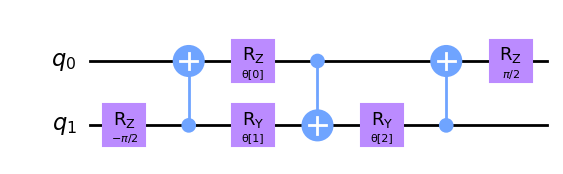

In [5]:
# Define a function that creates a two-qubit parameterized quantum circuit (unitary)
# This circuit structure is based on a reference denoted as [3] in the original context.
def conv_circuit(params):
    # Initialize a 2-qubit quantum circuit
    target = QuantumCircuit(2)

    # Apply an Rz rotation of -π/2 on qubit 1 (second qubit)
    target.rz(-np.pi / 2, 1)

    # Apply a CNOT gate with control qubit 1 and target qubit 0
    target.cx(1, 0)

    # Apply an Rz rotation on qubit 0 by parameter params[0]
    target.rz(params[0], 0)

    # Apply an Ry rotation on qubit 1 by parameter params[1]
    target.ry(params[1], 1)

    # Apply a CNOT gate with control qubit 0 and target qubit 1
    target.cx(0, 1)

    # Apply an Ry rotation on qubit 1 by parameter params[2]
    target.ry(params[2], 1)

    # Apply a CNOT gate with control qubit 1 and target qubit 0
    target.cx(1, 0)

    # Apply an Rz rotation of π/2 on qubit 0
    target.rz(np.pi / 2, 0)

    # Return the constructed two-qubit unitary circuit
    return target


# Create a vector of three parameters named "θ" to be used in the circuit
params = ParameterVector("θ", length=3)

# Instantiate the parameterized two-qubit circuit with the defined parameters
circuit = conv_circuit(params)

# Draw the quantum circuit using matplotlib with 'clifford' style for better visualization
circuit.draw("mpl", style="clifford")

Now that we have defined these unitaries, it is time to create a function for the convolutional layer in our QCNN. To do so, we apply the two qubit unitary to neighboring qubits as seen in the ``conv_layer`` function below.

Note that we first apply the two qubit unitary to all even pairs of qubits followed by applying to odd pairs of qubits in a circular coupling manner, i.e. the as well as neighboring qubits being coupled, the first and final qubit are also coupled through a unitary gate.

Note that we add barriers into our quantum circuits for convenience when plotting, however they are not required for the actual QCNN and can be extracted from the following circuits.

In [ ]:
# Define a function to create a convolutional layer quantum circuit on `num_qubits` qubits,
# using parameterized two-qubit unitaries defined by `conv_circuit`.
def conv_layer(num_qubits, param_prefix):
    # Initialize a quantum circuit with the specified number of qubits and name it
    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")

    # Create a list of qubit indices, e.g., [0, 1, 2, 3] for 4 qubits
    qubits = list(range(num_qubits))

    # Initialize the parameter index counter
    param_index = 0

    # Create a ParameterVector with length 3 parameters per pair of qubits (each conv unitary needs 3)
    params = ParameterVector(param_prefix, length=num_qubits * 3)

    # First loop: apply conv_circuit on pairs of qubits with even-odd indices (0-1, 2-3, ...)
    for q1, q2 in zip(qubits[0::2], qubits[1::2]):
        # Compose the two-qubit convolution unitary on qubits q1 and q2 using 3 parameters
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()  # Add a barrier for visual separation in the circuit
        param_index += 3  # Move parameter index forward by 3

    # Second loop: apply conv_circuit on pairs with shifted indices (1-2, 3-0, wrapping around)
    for q1, q2 in zip(qubits[1::2], qubits[2::2] + [0]):
        # Compose convolution unitary on these pairs similarly
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()  # Add a barrier for clarity
        param_index += 3  # Advance parameter index by 3 again

    # Convert the entire convolutional layer circuit into a reusable instruction
    qc_inst = qc.to_instruction()

    # Create a new circuit on the original qubits
    qc = QuantumCircuit(num_qubits)

    # Append the convolutional layer instruction to this circuit on all qubits
    qc.append(qc_inst, qubits)

    # Return the complete convolutional layer circuit
    return qc


# Instantiate the convolutional layer on 4 qubits with parameters prefix "θ"
circuit = conv_layer(4, "θ")

# Decompose the circuit (show underlying gates) and draw it with matplotlib in clifford style
circuit.decompose().draw("mpl", style="clifford")


### 1.2.2 Pooling Layer

The purpose of a pooling layer is to reduce the dimensions of our Quantum Circuit, i.e. reduce the number of qubits in our circuit, while retaining as much information as possible from previously learned data. Reducing the amount of qubits also reduces the computational cost of the overall circuit, as the number of parameters that the QCNN needs to learn decreases.

However, one cannot simply decrease the amount of qubits in our quantum circuit. Because of this, we must define the pooling layer in a different manner compared with the classical approach.

To 'artificially' reduce the number of qubits in our circuit, we first begin by creating pairs of the $N$ qubits in our system.

After initially pairing all the qubits, we apply our generalized 2 qubit unitary to each pair, as described previously. After applying this two qubit unitary, we then ignore one qubit from each pair of qubits for the remainder of the neural network.

This layer therefore has the overall effect of 'combining' the information of the two qubits into one qubit by first applying the unitary circuit, encoding information from one qubit into another, before disregarding one of qubits for the remainder of the circuit and not performing any operations or measurements on it.

We note that one could also apply a dynamic circuit to reduce the dimensionality in the pooling layers. This would involve performing measurements on certain qubits in the circuit and having an intermediate classical feedback loop in our pooling layers. By applying these measurements, one would also be reducing the dimensionality of the circuit.

In this tutorial, we apply the former approach, and disregard qubits in each pooling layer. Using this approach, we thus create a QCNN Pooling Layer which transforms the dimensions of our $N$ qubit Quantum Circuit to $N/2$.

To do so, we first define a two qubit unitary, which transforms the two qubit system to one.


In [ ]:
# Define a function that creates a two-qubit parameterized quantum pooling circuit.
def pool_circuit(params):
    # Initialize a quantum circuit with 2 qubits
    target = QuantumCircuit(2)

    # Apply an Rz rotation of -π/2 on qubit 1 (second qubit)
    target.rz(-np.pi / 2, 1)

    # Apply a CNOT gate with control qubit 1 and target qubit 0
    target.cx(1, 0)

    # Apply an Rz rotation on qubit 0 by the first parameter in params
    target.rz(params[0], 0)

    # Apply an Ry rotation on qubit 1 by the second parameter in params
    target.ry(params[1], 1)

    # Apply a CNOT gate with control qubit 0 and target qubit 1
    target.cx(0, 1)

    # Apply an Ry rotation on qubit 1 by the third parameter in params
    target.ry(params[2], 1)

    # Return the constructed two-qubit pooling circuit
    return target


# Create a vector of three symbolic parameters named "θ" to be used in the pooling circuit
params = ParameterVector("θ", length=3)

# Instantiate the parameterized two-qubit pooling circuit with these parameters
circuit = pool_circuit(params)

# Draw the quantum circuit using matplotlib with 'clifford' style for clear visualization
circuit.draw("mpl", style="clifford")

After applying this two qubit unitary circuit, we neglect the first qubit (q0) in future layers and only use the second qubit (q1) in our QCNN

We apply this two qubit pooling layer to different pairs of qubits to create our pooling layer for N qubits. As an example we then plot it for four qubits.

In [ ]:
# Define a function to create a pooling layer circuit using pairs of qubits from sources and sinks.
def pool_layer(sources, sinks, param_prefix):
    # Calculate the total number of qubits involved in the pooling layer
    num_qubits = len(sources) + len(sinks)

    # Initialize a quantum circuit with the total number of qubits and name it
    qc = QuantumCircuit(num_qubits, name="Pooling Layer")

    # Initialize parameter index counter to track parameters used for each pooling unit
    param_index = 0

    # Create a ParameterVector with 3 parameters for each pair of qubits (source-sink)
    params = ParameterVector(param_prefix, length=(num_qubits // 2) * 3)

    # Loop through pairs of source and sink qubits
    for source, sink in zip(sources, sinks):
        # Compose the pooling circuit (defined by pool_circuit) on each source-sink pair,
        # using a slice of 3 parameters from the ParameterVector
        qc = qc.compose(pool_circuit(params[param_index : (param_index + 3)]), [source, sink])

        # Add a barrier to visually separate operations for clarity in the circuit diagram
        qc.barrier()

        # Increment parameter index by 3 for the next pooling unit
        param_index += 3

    # Convert the constructed pooling layer circuit into a reusable instruction
    qc_inst = qc.to_instruction()

    # Create a new circuit for the total qubits to append the instruction cleanly
    qc = QuantumCircuit(num_qubits)

    # Append the pooling layer instruction to the circuit acting on all qubits
    qc.append(qc_inst, range(num_qubits))

    # Return the complete pooling layer circuit
    return qc


# Define source qubits indices (e.g., [0, 1])
sources = [0, 1]

# Define sink qubits indices (e.g., [2, 3])
sinks = [2, 3]

# Instantiate the pooling layer circuit for the given qubits and parameters prefix "θ"
circuit = pool_layer(sources, sinks, "θ")

# Decompose the circuit to show individual gates and draw it with matplotlib using clifford style
circuit.decompose().draw("mpl", style="clifford")

In this particular example, we reduce the dimensionality of our four qubit circuit to the last two qubits, i.e. the last two qubits in this particular example. These qubits are then used in the next layer, while the first two are neglected for the remainder of the QCNN.

### 1.2.3. Data Generation

One common use of a CCNN is an image classifier, where a CCNN detects particular features and patterns (such as straight lines or curves) of the pixelated images through the use of the feature maps in the convolutional layer. By learning the relationship between these features, it can then classify and label handwritten digits with ease.

Because of a classical CNN's ability to recognize features and patterns easily, we will train our QCNN to also determine patterns and features of a given set of pixelated images, and classify between two different patterns.

To simplify the dataset, we only consider 2 x 4 pixelated images. The patterns we will train the QCNN to distinguish will be a horizontal or vertical line, which can be placed anywhere in the image, alongside a noisy background.

We first begin by generating this dataset. To create a 'horizontal' or 'vertical' line, we assign pixels value to be $\frac{\pi}{2}$ which will represent the line in our pixelated image. We create a noisy background by assigning every other pixel a random value between $0$ and $\frac{\pi}{4}$ which will create a noisy background.

Note that when we create our dataset, we need to split it into the training set and testing set of images, the datasets we train and test our neural network respectively.

We also need to label our datasets such that the QCNN can learn to differentiate between the two patterns. In this example we label images with a horizontal line with -1 and images with a vertical line +1.

In [9]:
# Define a function to generate a dataset of quantum feature vectors and corresponding labels
def generate_dataset(num_images):
    images = []  # List to store generated image feature vectors
    labels = []  # List to store class labels for each image

    # Initialize two arrays representing horizontal and vertical "images"
    hor_array = np.zeros((6, 8))  # 6 horizontal patterns, each of length 8
    ver_array = np.zeros((4, 8))  # 4 vertical patterns, each of length 8

    # Fill hor_array with π/2 values in adjacent pairs for horizontal line patterns,
    # skipping the middle index 3 to avoid overlap
    j = 0
    for i in range(0, 7):
        if i != 3:
            hor_array[j][i] = np.pi / 2       # Set rotation angle π/2 at position i
            hor_array[j][i + 1] = np.pi / 2   # Also set π/2 at adjacent position i+1
            j += 1

    # Fill ver_array with π/2 values split into two groups of 4 positions,
    # representing vertical line patterns
    j = 0
    for i in range(0, 4):
        ver_array[j][i] = np.pi / 2          # Set π/2 at position i in the first half
        ver_array[j][i + 4] = np.pi / 2      # Set π/2 at corresponding position in second half
        j += 1

    # Generate num_images random images with labels
    for n in range(num_images):
        # Randomly choose class: 0 for horizontal (-1 label), 1 for vertical (+1 label)
        rng = algorithm_globals.random.integers(0, 2)
        if rng == 0:
            labels.append(-1)  # Label for horizontal pattern
            random_image = algorithm_globals.random.integers(0, 6)  # Pick random horizontal pattern
            images.append(np.array(hor_array[random_image]))        # Append the pattern to images list
        elif rng == 1:
            labels.append(1)   # Label for vertical pattern
            random_image = algorithm_globals.random.integers(0, 4)  # Pick random vertical pattern
            images.append(np.array(ver_array[random_image]))        # Append the pattern to images list

        # Add noise to zero-valued entries in the last appended image
        for i in range(8):
            if images[-1][i] == 0:
                # Replace zeros with a random value uniformly sampled between 0 and π/4
                images[-1][i] = algorithm_globals.random.uniform(0, np.pi / 4)

    # Return the list of generated images (feature vectors) and their corresponding labels
    return images, labels

Let's now create our dataset below and split it into our test and training datasets. We pass a `random_state` so the split will be the same each time this notebook is run so the final results do not vary.

In [10]:
# Generate a dataset of 50 quantum feature vectors (images) and their labels using the custom generator function
images, labels = generate_dataset(50)

# Split the dataset into training and testing subsets
# - 70% of the data will be used for training, 30% for testing
# - random_state=246 ensures reproducibility of the split
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.3, random_state=246
)

Let's see some examples in our dataset

In [ ]:
# Create a 2x2 grid of subplots with specified figure size
# Disable x and y ticks on all subplots for a cleaner image display
fig, ax = plt.subplots(2, 2, figsize=(10, 6), subplot_kw={"xticks": [], "yticks": []})

# Loop through the first 4 training images
for i in range(4):
    # Reshape each 1D image vector back into a 2x4 matrix for visualization
    # Display the reshaped image in the corresponding subplot
    ax[i // 2, i % 2].imshow(
        train_images[i].reshape(2, 4),
        aspect="equal",  # Keep pixels square
    )

# Adjust spacing between subplots for better layout
plt.subplots_adjust(wspace=0.1, hspace=0.025)

As we can see each image contains either a vertical or horizontal line, that the QCNN will learn how to differentiate. Now that we have built our dataset, it is time to discuss the components of the QCNN and build our model.

### 1.2.4. Modeling our QCNN

Now that we have defined both the convolutional layers it is now time to build our QCNN, which will consist of alternating pooling and convolutional layers.

As the images in our dataset contains 8 pixels, we will use 8 qubits in our QCNN.

We encode our dataset into our QCNN by applying a feature map. One can create a feature map using one of Qiskit's built in feature maps, such as ZFeatureMap or ZZFeatureMap.

After analyzing several different Feature maps for this dataset, it was found that QCNN obtains the greatest accuracy when the Z feature map is used. Therefore, throughout the remainder of the tutorial we will use the Z feature Map, of which can be seen below.

In [ ]:
# Create a quantum feature map circuit using Z rotations on 8 qubits
feature_map = ZFeatureMap(8)

# Decompose the feature map circuit into its elementary gates
# and draw it using matplotlib with the 'clifford' style for clear visualization
feature_map.decompose().draw("mpl", style="clifford")

We create a function for our QCNN, which will contain three sets of alternating convolutional and pooling layers, which can be seen in the schematic below. Through the use of the pooling layers, we thus reduce the dimensionality of our QCNN from eight qubits to one.

<a href="https://ibb.co/xtCtmH5d"><img src="https://i.ibb.co/ycfchSs7/image.png" alt="image" border="0"></a><br /><a target='_blank' href='https://nl.imgbb.com/'></a><br />

To classify our image dataset of horizontal and vertical lines, we measure the expectation value of the Pauli Z operator of the final qubit. Based on the obtained value being +1 or -1, we can conclude that the input image contained either a horizontal or vertical line.

---

### 1.2.5. Training our QCNN

The next step is to build our model using our training data.

To classify our system, we perform a measurement from the output circuit. The value we obtain will thus classify whether our input data contains either a vertical line or horizontal line.

The measurement we have chosen in this tutorial is $<Z>$, i.e. the expectation value of the Pauli Z qubit for the final qubit. Measuring this expectation value, we obtain +1 or -1, which correspond to a vertical or horizontal line respectively.

In [ ]:
# Create an 8-qubit ZFeatureMap to encode classical data via Z rotations on each qubit
feature_map = ZFeatureMap(8)

# Initialize an empty 8-qubit quantum circuit named "Ansatz" for the trainable layers
ansatz = QuantumCircuit(8, name="Ansatz")

# Compose the first convolutional layer on all 8 qubits using parameters prefixed "c1"
ansatz.compose(conv_layer(8, "c1"), list(range(8)), inplace=True)

# Compose the first pooling layer acting on qubit pairs ([0,1,2,3] as sources and [4,5,6,7] as sinks)
ansatz.compose(pool_layer([0, 1, 2, 3], [4, 5, 6, 7], "p1"), list(range(8)), inplace=True)

# Compose the second convolutional layer on the upper 4 qubits (4 through 7) with parameters "c2"
ansatz.compose(conv_layer(4, "c2"), list(range(4, 8)), inplace=True)

# Compose the second pooling layer on qubits 4 to 7 with sources [0,1] and sinks [2,3] relative to that subset
ansatz.compose(pool_layer([0, 1], [2, 3], "p2"), list(range(4, 8)), inplace=True)

# Compose the third convolutional layer on last two qubits (6 and 7) with parameters "c3"
ansatz.compose(conv_layer(2, "c3"), list(range(6, 8)), inplace=True)

# Compose the third pooling layer on qubits 6 and 7 with source 0 and sink 1 relative to that subset
ansatz.compose(pool_layer([0], [1], "p3"), list(range(6, 8)), inplace=True)

# Create a new 8-qubit circuit to combine feature map and ansatz
circuit = QuantumCircuit(8)
# Append the feature map to the circuit
circuit.compose(feature_map, range(8), inplace=True)
# Append the ansatz after the feature map
circuit.compose(ansatz, range(8), inplace=True)

# Define the observable as a Pauli Z operator acting on the first qubit (others identity)
observable = SparsePauliOp.from_list([("Z" + "I" * 7, 1)])

# Decompose the circuit to simplify it and avoid data copying overhead in QNN
# Create an EstimatorQNN object specifying the circuit, observable, and parameters
qnn = EstimatorQNN(
    circuit=circuit.decompose(),
    observables=observable,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    estimator=estimator,
)

In [ ]:
# Draw the full quantum circuit combining feature map and ansatz
# Use matplotlib rendering with 'clifford' style for clear, standardized gate visuals
circuit.draw("mpl", style="clifford")

We will also define a callback function to use when training our model. This allows us to view and plot the loss function per each iteration in our training process.

In [15]:
# Define a callback function to track and visualize training progress during optimization
def callback_graph(weights, obj_func_eval):
    # Clear previous output to update plot dynamically without flooding output cells
    clear_output(wait=True)

    # Append the current objective function evaluation (loss) to the list for plotting
    objective_func_vals.append(obj_func_eval)

    # Set plot title and axis labels
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")

    # Plot the objective function values over all completed iterations
    plt.plot(range(len(objective_func_vals)), objective_func_vals)

    # Display the updated plot
    plt.show()

In this example, we will use the COBYLA optimizer to train our classifier, which is a numerical optimization method commonly used for classification machine learning algorithms.

We then place the the callback function, optimizer and operator of our QCNN created above into Qiskit Machine Learning's built in Neural Network Classifier, which we can then use to train our model.

Since model training may take a long time we have already pre-trained the model for some iterations and saved the pre-trained weights. We'll continue training from that point by setting `initial_point` to a vector of pre-trained weights.

In [16]:
# Open a JSON file containing precomputed initial parameter values for the classifier
with open("11_qcnn_initial_point.json", "r") as f:
    initial_point = json.load(f)

# Create a NeuralNetworkClassifier using the quantum neural network 'qnn'
# - Use COBYLA optimizer with a maximum of 200 iterations
# - Use 'callback_graph' to visualize training progress dynamically
# - Initialize the optimizer parameters with values from 'initial_point' to potentially improve convergence
classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=COBYLA(maxiter=200),
    callback=callback_graph,
    initial_point=initial_point,
)

After creating this classifier, we can train our QCNN using our training dataset and each image's corresponding label. Because we previously defined the callback function, we plot the overall loss of our system per iteration.

It may take some time to train the QCNN so be patient!

In [ ]:
# Convert training images and labels to NumPy arrays for compatibility with scikit-learn interface
x = np.asarray(train_images)
y = np.asarray(train_labels)

# Initialize a list to store objective function values during training for visualization
objective_func_vals = []

# Set default figure size for training loss plots
plt.rcParams["figure.figsize"] = (12, 6)

# Train the quantum neural network classifier using the training data
classifier.fit(x, y)

# Evaluate and print the classification accuracy on the training dataset, rounded to two decimals
print(f"Accuracy from the train data : {np.round(100 * classifier.score(x, y), 2)}%")

As we can see from above, the QCNN converges slowly, hence our `initial_point` was already close to an optimal solution. The next step is to determine whether our QCNN can classify data seen in our test image data set.

### 1.2.6. Testing our QCNN

After building and training our dataset we now test whether our QCNN can predict images that are not from our test data set.

In [ ]:
# Use the trained classifier to predict labels for the test images
y_predict = classifier.predict(test_images)

# Convert test images and labels to NumPy arrays for scoring
x = np.asarray(test_images)
y = np.asarray(test_labels)

# Print the classification accuracy on the test dataset, rounded to two decimals
print(f"Accuracy from the test data : {np.round(100 * classifier.score(x, y), 2)}%")

# Visualize 4 test images along with the QCNN's predictions
fig, ax = plt.subplots(2, 2, figsize=(10, 6), subplot_kw={"xticks": [], "yticks": []})

# Loop over the first 4 test images
for i in range(0, 4):
    # Reshape each image back into 2x4 format for visualization
    ax[i // 2, i % 2].imshow(test_images[i].reshape(2, 4), aspect="equal")

    # Set subplot title based on the predicted label: -1 means Horizontal Line, +1 means Vertical Line
    if y_predict[i] == -1:
        ax[i // 2, i % 2].set_title("The QCNN predicts this is a Horizontal Line")
    if y_predict[i] == +1:
        ax[i // 2, i % 2].set_title("The QCNN predicts this is a Vertical Line")

# Adjust spacing between subplots for clarity
plt.subplots_adjust(wspace=0.1, hspace=0.5)

From above, we can indeed see that our QCNN can classify horizontal and vertical lines! Congratulations! Through the use of quantum circuits and quantum convolutional and pooling layers, you have built a Quantum Convolutional Neural Network!

## 2. Quantum Autoencoder

The goal of this tutorial is to build an Quantum Autoencoder, a circuit which can compress a quantum state onto a smaller amount of qubits, while retaining the information from the initial state.

Throughout this tutorial, we explain the architecture of a Quantum Autoencoder and how one can design and train such a system to compress and encode information. Following this discussion, we give two examples to demonstrate the capabilities of such a system to compress different quantum states, as well as the ability to compress images of zeros and ones.

### 2.1. What is an Autoencoder?

A classical autoencoder (CAE) is a type of neural network architecture that is commonly used to efficiently compress and encode information from the input using of representation learning. Following compression, one can then uncompress the data through the use of a decoder.

Typical autoencoders are commonly divided into three layers, as seen in Figure 1.


The first layer is called the Input Layer (1) and is the layer of which we input our data of length $n$.

The input data then passes through an encoder and travels to the next layer, which has less nodes or is reduced in dimensions and is known as the Bottleneck Layer (2). The input layer is compressed through this process. Common CAEs may have several layers.

The final layer is called the Output Layer (3). Here the compressed data is reconstructed to its original size, $n$, from the compressed data through the process of a decoder.

By passing our input data through a CAE, we are therefore able to reduce the dimensionality of our input data, as seen in the bottleneck layer, while retaining as much information as possible from the input data. Because of this feature, common uses of CAE are Image Denoising, Anomaly Detection and Facial Recognition devices. For more information on classical autoencoders.

<a href="https://ibb.co/cc13r0q9"><img src="https://i.ibb.co/xSDL7WZb/image.png" alt="image" border="0"></a><br /><a target='_blank' href='https://nl.imgbb.com/'></a><br />

### 2.2. The Quantum Autoencoder

We can also define a quantum counterpart to the CAE, the Quantum Autoencoder. Much like the CAE, the Quantum Autoencoder aims to reduce the dimensionality of the input of the neural network, in this case a quantum state. A pictorial representation of this can be seen in Figure 2.

<a href="https://ibb.co/kgY5G9d5"><img src="https://i.ibb.co/hRpLgZqL/image.png" alt="image" border="0"></a><br /><a target='_blank' href='https://nl.imgbb.com/'></a><br />

*Figure 2: Pictorial Representation of a Quantum Autoencoder. Here one can see the similarities with the CAE, with the circuit having an input state, bottleneck state and an output state.*




Much like its classical counterpart, our circuit contains three layers. We first input our state $|\psi>$ (which contains $n$ qubits), of which we wish to compress. This is our input layer (1).

We then apply our parametrized circuit on our input state, which will act as our encoder and 'compresses' our quantum state, reducing the dimensionality of our state to $n-k$ qubits. Our new compressed state is of the form $|\psi_{comp}> \otimes |0>^{\otimes k}$, where $|\psi_{comp}>$ contains $n-k$ qubits.

This parametrized circuit will depend on a set of parameters, which will be the nodes of our Quantum Autoencoder. Throughout the training process, these parameters will be updated to optimize the loss function.

We disregard the remaining $k$ qubits for the remainder of the circuit. This is our bottleneck layer (2) and our input state is now compressed.

The final layer consists of the addition of $k$ qubits (all in the state $|0\rangle$) and applying another parametrized circuit between the compressed state and the new qubits. This parametrized circuit acts as our decoder and reconstructs the input state from the compressed state using the new qubits. After the decoder, we retain the original state as the state travels to the output layer (3).

---

### 2.3. Components of a Quantum Autoencoder

Before building our Quantum Autoencoder, we must note a few subtleties.

We first note that we cannot introduce or disregard qubits in the middle of a Quantum Circuit when implementing an autoencoder using Qiskit.

Because of this we must include our reference state as well as our auxiliary qubits (whose role will be described in later sections) at the beginning of the circuit.

Therefore our input state will consist of our input state, reference state and one auxiliary qubit, as well as a classical register to perform measurements (which will be described in the next section). A pictorial representation of this can be seen in Figure 3.

<a href="https://ibb.co/rKyQscGx"><img src="https://i.ibb.co/GfPdTtvW/image.png" alt="image" border="0"></a><br /><a target='_blank' href='https://nl.imgbb.com/'></a><br />

*Figure 3: Pictorial Representation of input state of Quantum Autoencoder. Note that we must also include an auxiliary qubit, the reference state and classical register at the beginning of the circuit, even though they are not used until later in the circuit.*

### 2.4. Choosing a Loss Function

We now define our cost function, which we will use to train our Quantum Autoencoder, to return the input state. There's a bit of math involved here, so skip this section if you're not interested!

We take the cost function as defined in [2], which tries to maximize the fidelity between the input and output state of our Quantum Autoencoder.

We first define subsystems $A$ and $B$ to contain $n$ and $k$ qubits respectively, while $B'$ is the space which will contain our reference space. We call the subsystem $A$ our latent space, which will contain the compressed qubit state, and $B$ our trash space, which contain the qubits of which we disregard throughout compression.

Our input state therefore $|\psi_{AB}>$ contains $n + k$ qubits. We define the reference space $B'$ which contains the reference state $|a>_{B'}$. This space will contain the additional $k$ qubits we use in the decoder. All of these subsystems can be seen in Figure 3.

We define the parameterized circuit as $U(\theta)$ which we will use as our encoder. However the structure and parameters of our parametrized circuit is currently unknown to us and may vary for different input states. To determine the parameters to compress our input state, we must train our device to maximally compress the state by adjusting the values of the parameters $\theta$. For the decoder we will use $U^{\dagger}(\theta)$.

Our goal therefore is to maximize the fidelity between the input and output states, i.e.

$$\text{max }F(\psi_{AB}, \rho_{out})$$

where

$$\rho_{out} = U^{\dagger}(\theta)_{AB'} \text{Tr}_{B} [U(\theta)_{AB}[\psi_{AB} \otimes a_{B'}]U^{\dagger}(\theta)_{AB}]U(\theta)_{AB'}$$

We can maximize this fidelity by tuning the parameters $\theta$ in our parametrized circuit. However, this fidelity can at times be complicated to determine and may require a large amount of gates needed to calculate the fidelity between two states, i.e. the larger the number of qubits, the more gates required which results to deeper circuits.  Therefore we look for alternative means of comparing the input and output states.

As shown in [2] a simpler way of determining an optimally compressed state is to perform a swap gate between the trash state and reference state. These states usually have a smaller number of qubits and are therefore easier to compare, due to the smaller amount of gates required. As shown in [2] maximizing the fidelity of such these two states is equivalent to maximizing the fidelity of the input and output state and thus determining an optimal compression of our input circuit.

Keeping our reference state fixed, our cost function will now be a function of the trash state and is denoted as;

$$\text{max }F(\text{Tr}_{A} [ U(\theta)_{AB}\psi_{AB} U^{\dagger}(\theta)_{AB}], a_{B'})$$

Throughout the training process, we adjust the parameters $\theta$ in our encoder and perform a swap test (as described below) to determine the fidelity between these trash and reference states. In doing so, we must include an additional qubit, our auxiliary qubit, which will be used throughout the swap test and measured to determine the overall fidelity of the trash and reference states. This is the reason why we included both an auxiliary qubit and classical register in the previous section when initializing our circuit.  

### 2.5. The SWAP Test

The SWAP Test is a procedure commonly used to compare two states by applying CNOT gates to each qubit (for further information see [3]). By running the circuit $M$ times, and applying the SWAP test, we then measure the auxiliary qubit. We use the number of states in the state $|1\rangle$ to compute:

$$S = 1 - \frac{2}{M}L$$

where $L$ is the count for the states in the $|1\rangle$ state. As shown in [3], maximizing this function corresponds to the two states of which we are comparing being identical. We therefore aim to maximize this function, i.e. minimize  $\frac{2}{M}L$. This value will be therefore be our cost function.

### 2.6. Building the Quantum Autoencoder Ansatz

First, we implement IBM's Qiskit to build our Quantum Autoencoder. We first begin by importing in the necessary libraries and fixing the seed.

In [19]:
import json
import time
import warnings

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit.quantum_info import Statevector
from qiskit_machine_learning.optimizers import COBYLA
from qiskit_machine_learning.utils import algorithm_globals

from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit_machine_learning.neural_networks import SamplerQNN

algorithm_globals.random_seed = 42
sampler = Sampler()

We begin by defining our parametrized ansatz for the Quantum Autoencoder. This will be our parametrized circuit where we can tune the parameters to maximize the fidelity between the trash and reference states.

### 2.7. The Parametrized Circuit

The parametrized circuit we will use below for our encoder is the RealAmplitude Ansatz available in Qiskit. One of the reasons why we have chosen this ansatz is because it is a 2-local circuit, the prepared quantum states will only have real amplitudes, and does not rely on full connectivity between each qubits, which is hard to implement or can lead to deep circuits.

We define our parametrized circuit for our Encoder below, where we set the repetition parameter to `reps=5`, to increase the number of parameters in our circuit allowing greater flexibility.

In [20]:
# Define a function named 'ansatz' that creates a parameterized quantum circuit
# The circuit uses the RealAmplitudes ansatz with the specified number of qubits
# 'reps=5' means the ansatz layers (rotation + entanglement) are repeated 5 times
def ansatz(num_qubits):
    return RealAmplitudes(num_qubits, reps=5)

Let's draw this ansatz with $5$ qubits and see what it looks like.

In [ ]:
# Set the number of qubits for the ansatz circuit to 5
num_qubits = 5

# Generate the ansatz circuit using the previously defined function
circ = ansatz(num_qubits)

# Decompose the ansatz circuit into elementary gates for detailed visualization
# Draw the decomposed circuit using matplotlib with the 'clifford' style for clarity
circ.decompose().draw(output="mpl", style="clifford")

We now apply this Encoder to the state we wish to compress. In this example, we divide our initial $5$ qubit state into a $3$ qubit latent state ($n = 3$) and $2$ qubit trash space ($k = 2$).

As explained in the previous section, we must also include a $2$ qubit reference space in our circuit, as well as an auxiliary qubit to perform the swap test between the reference and trash states. We will therefore have a total of $2 + 3 + 2 + 1 = 8$ qubits and $1$ classical register in our circuit.

After initializing our state, we apply our parametrized circuit.

Following this, we then split our initial state into the latent space (the compressed state) and trash space (the part of the state we will disregard) and perform the swap test between the reference state and the trash space. The last qubit is then measured to determine the fidelity between the reference and trash states.  A pictorial representation of this is given below in Figure 4.

<a href="https://ibb.co/DHmh1Gmp"><img src="https://i.ibb.co/Q3hLJ8hd/image.png" alt="image" border="0"></a><br /><a target='_blank' href='https://nl.imgbb.com/'></a><br />

*Figure 4: Example of a Quantum Autoencoder in the training process. We use the swap test to determine the fidelity between the trash and reference space.*

We define a function below to implement the above circuit configuration to the $5$ qubit domain wall state $|00111\rangle$ and plot an example below. Here qubits $5$ and $6$ are the reference state, $0, 1, 2, 3, 4$ are the initial state we wish to compress and qubit $7$ is our auxiliary qubit which is used in the swap test. We also include a classical register to measure the results of qubit $7$ in the swap test.

In [ ]:
# Define a function to create an autoencoder quantum circuit with latent and trash qubits
def auto_encoder_circuit(num_latent, num_trash):
    # Create a quantum register with total qubits: latent + 2 * trash + 1 auxiliary qubit
    qr = QuantumRegister(num_latent + 2 * num_trash + 1, "q")

    # Create a classical register with 1 bit for measurement
    cr = ClassicalRegister(1, "c")

    # Initialize the quantum circuit with these quantum and classical registers
    circuit = QuantumCircuit(qr, cr)

    # Compose the ansatz circuit on the first (num_latent + num_trash) qubits in-place
    circuit.compose(ansatz(num_latent + num_trash), range(0, num_latent + num_trash), inplace=True)

    # Insert a barrier to visually separate circuit sections
    circuit.barrier()

    # Define the index of the auxiliary qubit used for the swap test
    auxiliary_qubit = num_latent + 2 * num_trash

    # Begin the swap test by applying a Hadamard gate to the auxiliary qubit
    circuit.h(auxiliary_qubit)

    # Perform controlled swap operations between pairs of trash qubits controlled by the auxiliary qubit
    for i in range(num_trash):
        # Controlled SWAP between qubits: auxiliary controls swapping num_latent + i and num_latent + num_trash + i
        circuit.cswap(auxiliary_qubit, num_latent + i, num_latent + num_trash + i)

    # Apply another Hadamard gate to the auxiliary qubit to complete the swap test
    circuit.h(auxiliary_qubit)

    # Measure the auxiliary qubit and store the result in the classical register
    circuit.measure(auxiliary_qubit, cr[0])

    # Return the complete autoencoder circuit
    return circuit

# Define the number of latent qubits and trash qubits
num_latent = 3
num_trash = 2

# Create the autoencoder circuit with specified latent and trash qubits
circuit = auto_encoder_circuit(num_latent, num_trash)

# Draw the circuit using matplotlib with 'clifford' style for clear visualization
circuit.draw(output="mpl", style="clifford")

In order to reconstruct the original input state, we must apply the adjoint of our parametrized circuit after the swap test. However, during training, we are only interested in the trash state and the reference state. We can therefore exclude the gates following compression until we wish to reconstruct our initial input.

After building our Quantum Autoencoder, the next step is to train our Quantum Autoencoder to compress the state and maximize the cost function and determine the parameters $\theta$.

### 2.8. A Simple Example: The Domain Wall Autoencoder

Let's first begin with a simple example, a state known as the Domain Wall, which for $5$ qubits is given by $|00111\rangle$. Here we will try and compress this state from $5$ qubits to $3$ qubits, with the remaining qubits in the trash space, in the state $|00\rangle$. We can create a function to build the domain wall state below.

In [ ]:
# Define a function to apply a Domain Wall pattern on qubits from a to b in the given circuit
def domain_wall(circuit, a, b):
    # For qubits in the second half of the range [a, b), apply an X (NOT) gate
    for i in np.arange(int(b / 2), int(b)):
        circuit.x(i)
    # Return the modified circuit with Domain Wall applied
    return circuit

# Create a 5-qubit quantum circuit and apply the Domain Wall pattern from qubit 0 to 5
domain_wall_circuit = domain_wall(QuantumCircuit(5), 0, 5)

# Draw the resulting circuit using matplotlib with the 'clifford' style for clarity
domain_wall_circuit.draw("mpl", style="clifford")

Now let's train our Autoencoder to compress this state from 5 qubits to 3 qubits (qubits 0,1 and 2), with the remaining qubits in the trash space (qubits 3 and 4) being in the |00> state.

We create a circuit to be used in the loss function, as described in Section 4, which determines the fidelity between the two states below using the swap test for our particular AutoEncoder function. For further information on the swap test, see [1].

In [ ]:
# Create the autoencoder circuit with specified latent and trash qubits
ae = auto_encoder_circuit(num_latent, num_trash)

# Initialize a new quantum circuit with the total number of qubits and one classical bit for measurement
qc = QuantumCircuit(num_latent + 2 * num_trash + 1, 1)

# Compose the domain wall circuit on the first (num_latent + num_trash) qubits of qc
qc = qc.compose(domain_wall_circuit, range(num_latent + num_trash))

# Compose the autoencoder circuit 'ae' onto 'qc'
qc = qc.compose(ae)

# Draw the combined quantum circuit using matplotlib with the 'clifford' style for visualization
qc.draw(output="mpl", style="clifford")

Then, we create a quantum neural network and pass the circuit as a parameter. We note that this network must take an interpret function, which determines how we map the output of the network to the output shape. Since we measure only one qubit, the output of the network is a bit string either $0$ or $1$, so the output shape is $2$, the number of possible outcomes. Then, we introduce an identity mapping. The output of the network is a vector of probabilities of getting interpret-mapped bit strings. Thus, we get probabilities of getting $0$ or $1$ and this is exactly what we are looking for. In the cost function we make use of the probability of getting $1$ and penalize the outcomes that lead to $1$, therefore maximizing the fidelity between the trash space and the reference space.

In [ ]:
# Define an identity interpretation function that returns measurement outcomes unchanged
def identity_interpret(x):
    return x

# Create a SamplerQNN instance with the following settings:
qnn = SamplerQNN(
    circuit=qc,               # Use the composed quantum circuit 'qc'
    input_params=[],          # No input parameters (empty list) as data is embedded within the circuit
    weight_params=ae.parameters,  # Trainable weight parameters from the autoencoder circuit
    interpret=identity_interpret, # Use the identity interpret function to keep raw sampler outputs
    output_shape=2,           # Define the shape of the output space (e.g., binary outputs)
    sampler=sampler,          # Use the quantum sampler primitive to execute circuit and obtain samples
)

Next we create our cost function. As described in the previous section, our aim is to minimize $\frac{2}{M}L$, which is the twice the probability of getting the final qubit in the $|1\rangle$ state. We therefore wish to minimize the of getting a $|1\rangle$ on qubit 7.

The cost function will also plot out the objective value at each cost function evaluation.

In [40]:
# Define a cost function to be minimized during training using parameter values
def cost_func_domain(params_values):
    # Perform a forward pass on the quantum neural network 'qnn' with the given weights (params_values)
    # No input parameters are passed (empty list) because circuit inputs are fixed
    probabilities = qnn.forward([], params_values)

    # Calculate the cost as the sum of probabilities of measuring '1' in the output bitstring
    cost = np.sum(probabilities[:, 1])

    # Clear previous output to update the plot dynamically during optimization
    clear_output(wait=True)

    # Append the current cost value to the list for tracking
    objective_func_vals.append(cost)

    # Plot the objective function value progression against iteration count
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

    # Return the current cost value for the optimizer
    return cost

Now we will train our Autoencoder to reduce the dimension of the Hilbert space from $5$ qubits to $3$, while leaving the trash space in the state $|00\rangle$.  We initially set the parameters $\theta$ to random values and tune these parameters to minimize our cost function through the use of the COBYLA optimizer.

In [ ]:
# Initialize the COBYLA classical optimizer with a maximum of 150 iterations
opt = COBYLA(maxiter=150)

# Generate a random initial point for the parameters of the autoencoder circuit
initial_point = algorithm_globals.random.random(ae.num_parameters)

# Initialize an empty list to store objective function values during optimization for plotting
objective_func_vals = []

# Set figure size for plots to improve readability
plt.rcParams["figure.figsize"] = (12, 6)

# Record the start time for optimization
start = time.time()

# Run the optimization to minimize the cost function starting from the initial random parameters
opt_result = opt.minimize(cost_func_domain, initial_point)

# Calculate the elapsed time taken for optimization
elapsed = time.time() - start

# Print the total time taken for the fitting/training process
print(f"Fit in {elapsed:0.2f} seconds")

Looks like it has converged! After training our Quantum Autoencoder, let's build it and see how well it compresses the state!

To do this, we first apply our Autoencoder to a $5$ qubit Domain Wall state. After applying this state, the compressed state should be of the form $|00\rangle$. Therefore resetting the last two qubits should not effect our over all state.

After resetting we apply our decoder (the hermitian conjugate of our encoder) and compare it to the initial state by determining the fidelity. If our fidelity is one, then our Autoencoder has encoded all the information of the domain wall efficiently into a smaller set of qubits and when decoding, we retain the original state!

Let's first apply our circuit to the Domain Wall State, using the parameters we obtained when training our Quantum Autoencoder. (Note we have included barriers in our circuit below, however these are not necessary for the implementation of the Quantum Autoencoder and are used to determine between different sections of our circuit).

In [ ]:
# Initialize a quantum circuit with (num_latent + num_trash) qubits
test_qc = QuantumCircuit(num_latent + num_trash)

# Compose the domain wall circuit onto the test circuit
test_qc = test_qc.compose(domain_wall_circuit)

# Generate the ansatz circuit with the same number of qubits
ansatz_qc = ansatz(num_latent + num_trash)

# Compose the ansatz circuit onto the test circuit
test_qc = test_qc.compose(ansatz_qc)

# Add a barrier for visual separation in the circuit diagram
test_qc.barrier()

# Reset qubits 4 and 3 to the |0> state (discard any prior state)
test_qc.reset(4)
test_qc.reset(3)

# Add another barrier for clarity after resets
test_qc.barrier()

# Compose the inverse of the ansatz circuit onto the test circuit
# This essentially attempts to reverse the ansatz operations applied earlier
test_qc = test_qc.compose(ansatz_qc.inverse())

# Draw the complete test circuit using matplotlib with the 'clifford' style for clear visualization
test_qc.draw(output="mpl", style="clifford")

Now we assign the parameter values obtained in the training.

In [29]:
# Assign the optimized parameter values (from the optimization result `opt_result.x`)
# to the parameterized gates in the quantum circuit `test_qc`
test_qc = test_qc.assign_parameters(opt_result.x)

Now let's get the statevectors of our Domain Wall state and output circuit and calculate the fidelity!

In [ ]:
# Compute the statevector (quantum state) corresponding to the domain wall circuit
domain_wall_state = Statevector(domain_wall_circuit).data

# Compute the statevector corresponding to the test circuit after parameter assignment
output_state = Statevector(test_qc).data

# Calculate the fidelity between the domain wall input state and the output state
# Fidelity measures the closeness or overlap between the two quantum states
fidelity = np.sqrt(np.dot(domain_wall_state.conj(), output_state) ** 2)

# Print the real part of the fidelity value, indicating how well the output state matches the input
print("Fidelity of our Output State with our Input State: ", fidelity.real)


As you can see our fidelity is quite high and our Autoencoder has thus compressed our dataset while retaining all the information from the input state!

Now we will see if we can apply such a Quantum Autoencoder to more complicated datasets containing noise, such as images of the numbers zero and one.

### 2.9. A Quantum Autoencoder for Digital Compression

One can also apply a Quantum Autoencoder to more complicated examples, such as a set of handwritten digits in order to compress the dataset. Below, we will show that we can indeed train an Quantum Autoencoder to compress such an example, giving us the ability to store data more efficiently on a Quantum Computer.

For this tutorial, we will build a Quantum Autoencoder for a noisy dataset containing zeros and ones, which can be seen below.

Each image contains $32$ pixels of which can be encoded into $5$ qubits by Amplitude Encoding. This can be done using Qiskit Machine Learning's `RawFeatureVector` feature map.  

In [ ]:
# Function to return pixel coordinates representing a '0' digit pattern
def zero_idx(j, i):
    # Returns a list of coordinates for pixels that should be bright to form digit zero
    return [
        [i, j],
        [i - 1, j - 1],
        [i - 1, j + 1],
        [i - 2, j - 1],
        [i - 2, j + 1],
        [i - 3, j - 1],
        [i - 3, j + 1],
        [i - 4, j - 1],
        [i - 4, j + 1],
        [i - 5, j],
    ]

# Function to return pixel coordinates representing a '1' digit pattern
def one_idx(i, j):
    # Returns a list of coordinates for pixels that should be bright to form digit one
    return [[i, j - 1], [i, j - 2], [i, j - 3], [i, j - 4], [i, j - 5], [i - 1, j - 4], [i, j]]

# Function to generate a dataset of '0' and '1' digit images with noise, optionally drawing them
def get_dataset_digits(num, draw=True):
    train_images = []  # List to store generated images
    train_labels = []  # Corresponding labels (0 or 1)

    # Generate half of the dataset as '1's
    for i in range(int(num / 2)):
        # Create a noisy background by sampling values from uniform [0, 0.1)
        empty = np.array([algorithm_globals.random.uniform(0, 0.1) for i in range(32)]).reshape(8, 4)

        # Insert bright pixels for '1' digit at specified coordinates
        for i, j in one_idx(2, 6):
            empty[j][i] = algorithm_globals.random.uniform(0.9, 1)

        train_images.append(empty)  # Add the image to the dataset
        train_labels.append(1)      # Label it as '1'

        # Optionally display the generated '1' image
        if draw:
            plt.title("This is a One")
            plt.imshow(train_images[-1])
            plt.show()

    # Generate half of the dataset as '0's
    for i in range(int(num / 2)):
        # Create noisy background as before
        empty = np.array([algorithm_globals.random.uniform(0, 0.1) for i in range(32)]).reshape(8, 4)

        # Insert bright pixels for '0' digit using zero_idx coordinates
        for k, j in zero_idx(2, 6):
            empty[k][j] = algorithm_globals.random.uniform(0.9, 1)

        train_images.append(empty)  # Add the image to the dataset
        train_labels.append(0)      # Label it as '0'

        # Optionally display the generated '0' image
        if draw:
            plt.imshow(train_images[-1])
            plt.title("This is a Zero")
            plt.show()

    # Convert list of images to a NumPy array
    train_images = np.array(train_images)

    # Flatten images from 8x4 to 32-length vectors for model input
    train_images = train_images.reshape(len(train_images), 32)

    # Normalize each image vector to unit length (L2 norm = 1)
    for i in range(len(train_images)):
        sum_sq = np.sum(train_images[i] ** 2)
        train_images[i] = train_images[i] / np.sqrt(sum_sq)

    # Return normalized images and their corresponding labels
    return train_images, train_labels

# Generate a small sample dataset of 2 digit images without drawing them
train_images, __ = get_dataset_digits(2)


After encoding our image into $5$ qubits, we begin to train our Quantum Autoencoder to compress this state into $3$ qubits.

We repeat the steps in the previous example and write a cost function, again based on the Swap Test between the trash and latent space. We can also use the same Autoencoder function as given in the previous example, as the input state and trash space contain the same amount of qubits.

Let's input one of our digits and see our circuit for the Autoencoder below.

In [ ]:
# Set the number of latent and trash qubits for the autoencoder
num_latent = 3
num_trash = 2

# Create a RawFeatureVector feature map for 2^(num_latent + num_trash) dimensions
# This encodes classical data as quantum basis states over (num_latent + num_trash) qubits
fm = RawFeatureVector(2 ** (num_latent + num_trash))

# Generate the autoencoder quantum circuit with specified latent and trash qubits
ae = auto_encoder_circuit(num_latent, num_trash)

# Initialize a quantum circuit with total qubits for latent, trash, and auxiliary plus one classical bit
qc = QuantumCircuit(num_latent + 2 * num_trash + 1, 1)

# Compose the RawFeatureVector feature map on the first (num_latent + num_trash) qubits
qc = qc.compose(fm, range(num_latent + num_trash))

# Compose the autoencoder circuit on the entire circuit
qc = qc.compose(ae)

# Draw the complete circuit using matplotlib with the 'clifford' style for clear visualization
qc.draw(output="mpl", style="clifford")

Again, we can see the swap test being performed on the qubits $3$, $4$, $5$ and $6$, which will determine the value of our cost function.

In [ ]:
# Define an interpretation function that returns the measurement outcomes as is (identity function)
def identity_interpret(x):
    return x

# Create a SamplerQNN (quantum neural network using sampling) with the following configuration:
qnn = SamplerQNN(
    circuit=qc,                 # The composed quantum circuit combining feature map and autoencoder
    input_params=fm.parameters, # Parameters related to the RawFeatureVector feature map (input encoding)
    weight_params=ae.parameters,# Trainable parameters of the autoencoder circuit (weights)
    interpret=identity_interpret, # Use the identity interpretation function to keep raw measurement results
    output_shape=2,             # Define the output shape, e.g., for binary outcomes
    sampler=sampler,            # The sampler primitive to execute the quantum circuit and collect samples
)

We build our cost function, based on the swap test between the reference and trash space for the digit dataset. To do this, we again use Qiskit Machine Learning's CircuitQNN network and use the same interpret function as we are measuring the probability of getting the final qubit in the $|1\rangle$ state.

In [34]:
# Define a cost function to evaluate the performance of the quantum neural network on digit classification
def cost_func_digits(params_values):
    # Perform a forward pass on the QNN with training images and current parameter values
    probabilities = qnn.forward(train_images, params_values)

    # Calculate the average probability of measuring '1' across all training samples
    cost = np.sum(probabilities[:, 1]) / train_images.shape[0]

    # Plotting the cost progression during optimization
    clear_output(wait=True)  # Clear previous plot to update dynamically
    objective_func_vals.append(cost)  # Append current cost value for plotting

    # Set plot title and axis labels
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")

    # Plot all recorded objective function values
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

    # Return the computed cost for optimization
    return cost


Since model training may take a long time we have already pre-trained the model for some iterations and saved the pre-trained weights. We'll continue training from that point by setting `initial_point` to a vector of pre-trained weights.

In [35]:
# Open and read the JSON file containing precomputed initial parameter values for the quantum autoencoder
with open("12_qae_initial_point.json", "r") as f:
    initial_point = json.load(f)


By minimizing this cost function, we can thus determine the required parameters to compress our noisy images. Let's see if we can encode our images!

In [ ]:
# Initialize the COBYLA optimizer with a maximum of 150 iterations
opt = COBYLA(maxiter=150)

# Initialize an empty list to store the objective function values during optimization
objective_func_vals = []

# Set figure size for better visualization of the loss plot
plt.rcParams["figure.figsize"] = (12, 6)

# Record the starting time of the optimization
start = time.time()

# Run the optimizer to minimize the cost function starting from the given initial parameters
opt_result = opt.minimize(fun=cost_func_digits, x0=initial_point)

# Calculate elapsed time after optimization finishes
elapsed = time.time() - start

# Print the time taken to fit/train the model
print(f"Fit in {elapsed:0.2f} seconds")


Looks like it has converged!

Now let's build our Encoder and Decoder using the parameters obtained from the training period. After applying this circuit to our new dataset, we can then compare our input and output data and see if we were able to retain the images efficiently throughout the compression!

In [ ]:
# Testing phase: construct a test quantum circuit and evaluate the autoencoder on new images

# Initialize a quantum circuit with qubits equal to latent + trash qubits
test_qc = QuantumCircuit(num_latent + num_trash)

# Compose the RawFeatureVector feature map (input encoding) onto the test circuit
test_qc = test_qc.compose(fm)

# Generate the ansatz circuit with latent + trash qubits
ansatz_qc = ansatz(num_latent + num_trash)

# Compose the ansatz circuit onto the test circuit
test_qc = test_qc.compose(ansatz_qc)

# Add a barrier for clarity
test_qc.barrier()

# Reset qubits 4 and 3 to |0⟩ to discard prior states (simulate trash qubits)
test_qc.reset(4)
test_qc.reset(3)

# Add another barrier for visualization separation
test_qc.barrier()

# Compose the inverse of the ansatz to complete the autoencoder decoding step
test_qc = test_qc.compose(ansatz_qc.inverse())

# Generate new test images and labels (without displaying them)
test_images, test_labels = get_dataset_digits(2, draw=False)

# Loop over each test image and its label to analyze reconstruction
for image, label in zip(test_images, test_labels):
    # Assign the classical image data to the feature map parameters
    original_qc = fm.assign_parameters(image)
    # Compute the statevector of the original input image circuit
    original_sv = Statevector(original_qc).data
    # Reshape the probability amplitudes squared to 8x4 image format for visualization
    original_sv = np.reshape(np.abs(original_sv) ** 2, (8, 4))

    # Combine input image and optimized parameters for the test circuit
    param_values = np.concatenate((image, opt_result.x))
    # Assign these parameters to the test circuit
    output_qc = test_qc.assign_parameters(param_values)
    # Compute the statevector of the output circuit after encoding-decoding
    output_sv = Statevector(output_qc).data
    # Reshape output probabilities for visualization as image
    output_sv = np.reshape(np.abs(output_sv) ** 2, (8, 4))

    # Plot the original input image and the reconstructed output side-by-side
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(original_sv)
    ax1.set_title("Input Data")
    ax2.imshow(output_sv)
    ax2.set_title("Output Data")
    plt.show()


## Tasks 1.

1. What is the main purpose of a quantum convolutional neural network?
2. How does a QCNN differ from a classical CNN in terms of architecture?
3. What role do convolutional layers play in QCNNs?
4. How are pooling layers implemented in QCNNs?
5. Why are parameterized quantum circuits important in QCNNs?
6. What is the significance of the swap test in quantum autoencoders?
7. How does entanglement contribute to the feature extraction in QCNNs?
8. What types of quantum gates are typically used in QCNN convolution layers?
9. How does measurement affect the training process in QCNNs?
10. What challenges does quantum noise introduce in QCNN training and inference?

## Answers to Tasks 1.

### Write your answers here:

## Tasks 2.

1. Is `RealAmplitudes` an `ansatz`?
2. How many reps are in `ansatz`?
3. Does `auto_encoder_circuit` use swap test?
4. Is auxiliary qubit measured?
5. Does `domain_wall` apply X gates?
6. Are `X` gates applied on half qubits?
7. Does `pool_circuit` use `Rz` rotations?
8. Are CNOT gates used in `pool_circuit`?
9. Is pool_layer built from `pool_circuit`?
10. Does `conv_layer` include barriers?
11. Is `SparsePauliOp` used to define observables?
12. Is `EstimatorQNN` initialized with decomposed circuit?
13. Does `SamplerQNN` use sampling?
14. How many latent qubits are used in the autoencoder circuit?
15. Which register type holds classical bits?
16. What method visualizes quantum circuits?









## Answers to Tasks 2.

### Write your answers here:

## Tasks 3.

1. What is the primary goal of a quantum autoencoder?
2. How does a quantum autoencoder compress quantum data?
3. What is the role of trash qubits in a QAE?
4. How does the swap test function in the training of a QAE?
5. Why are variational circuits used in quantum autoencoders?
6. How is the fidelity metric used to evaluate a QAE's performance?
7. What advantages do quantum autoencoders have over classical autoencoders?
8. How does measurement affect the reconstruction process in a QAE?
9. What are the main sources of error during QAE training?
10. How does parameter optimization work in quantum autoencoders?

## Answers to Tasks 3.

### Write your answers here: